In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

Imported the needed libraries

In [2]:
data=pd.read_csv(r"C:\Users\Rakesh\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Read the file 

In [3]:
data.shape

(1470, 35)

So the data set contain 1470 rows and 35 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There is no null values in this data set 

We have int and object data types 

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We are confirming that the given data set contain no null values

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In that numerical columns , all data are seems good

In [8]:
lab_enc=LabelEncoder()
data1=lab_enc.fit_transform(data['Age'])
pd.Series(data1)
data['Age']=data1

Changed the Age column with label enocder method 

By the same way , doing for other object columns

In [9]:
data1=lab_enc.fit_transform(data['BusinessTravel'])
pd.Series(data1)
data['BusinessTravel']=data1

In [10]:
data1=lab_enc.fit_transform(data['Department'])
pd.Series(data1)
data['Department']=data1

In [11]:
data1=lab_enc.fit_transform(data['EducationField'])
pd.Series(data1)
data['EducationField']=data1

In [12]:
data1=lab_enc.fit_transform(data['Gender'])
pd.Series(data1)
data['Gender']=data1

In [13]:
data1=lab_enc.fit_transform(data['MaritalStatus'])
pd.Series(data1)
data['MaritalStatus']=data1

In [14]:
data1=lab_enc.fit_transform(data['JobRole'])
pd.Series(data1)
data['JobRole']=data1

In [15]:
data1=lab_enc.fit_transform(data['Over18'])
pd.Series(data1)
data['Over18']=data1

In [16]:
data1=lab_enc.fit_transform(data['OverTime'])
pd.Series(data1)
data['OverTime']=data1

In [17]:
data1=lab_enc.fit_transform(data['Attrition'])
pd.Series(data1)
data['Attrition']=data1

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

Confirming that all the object columns are changed

In [19]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,31,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,19,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,15,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,9,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


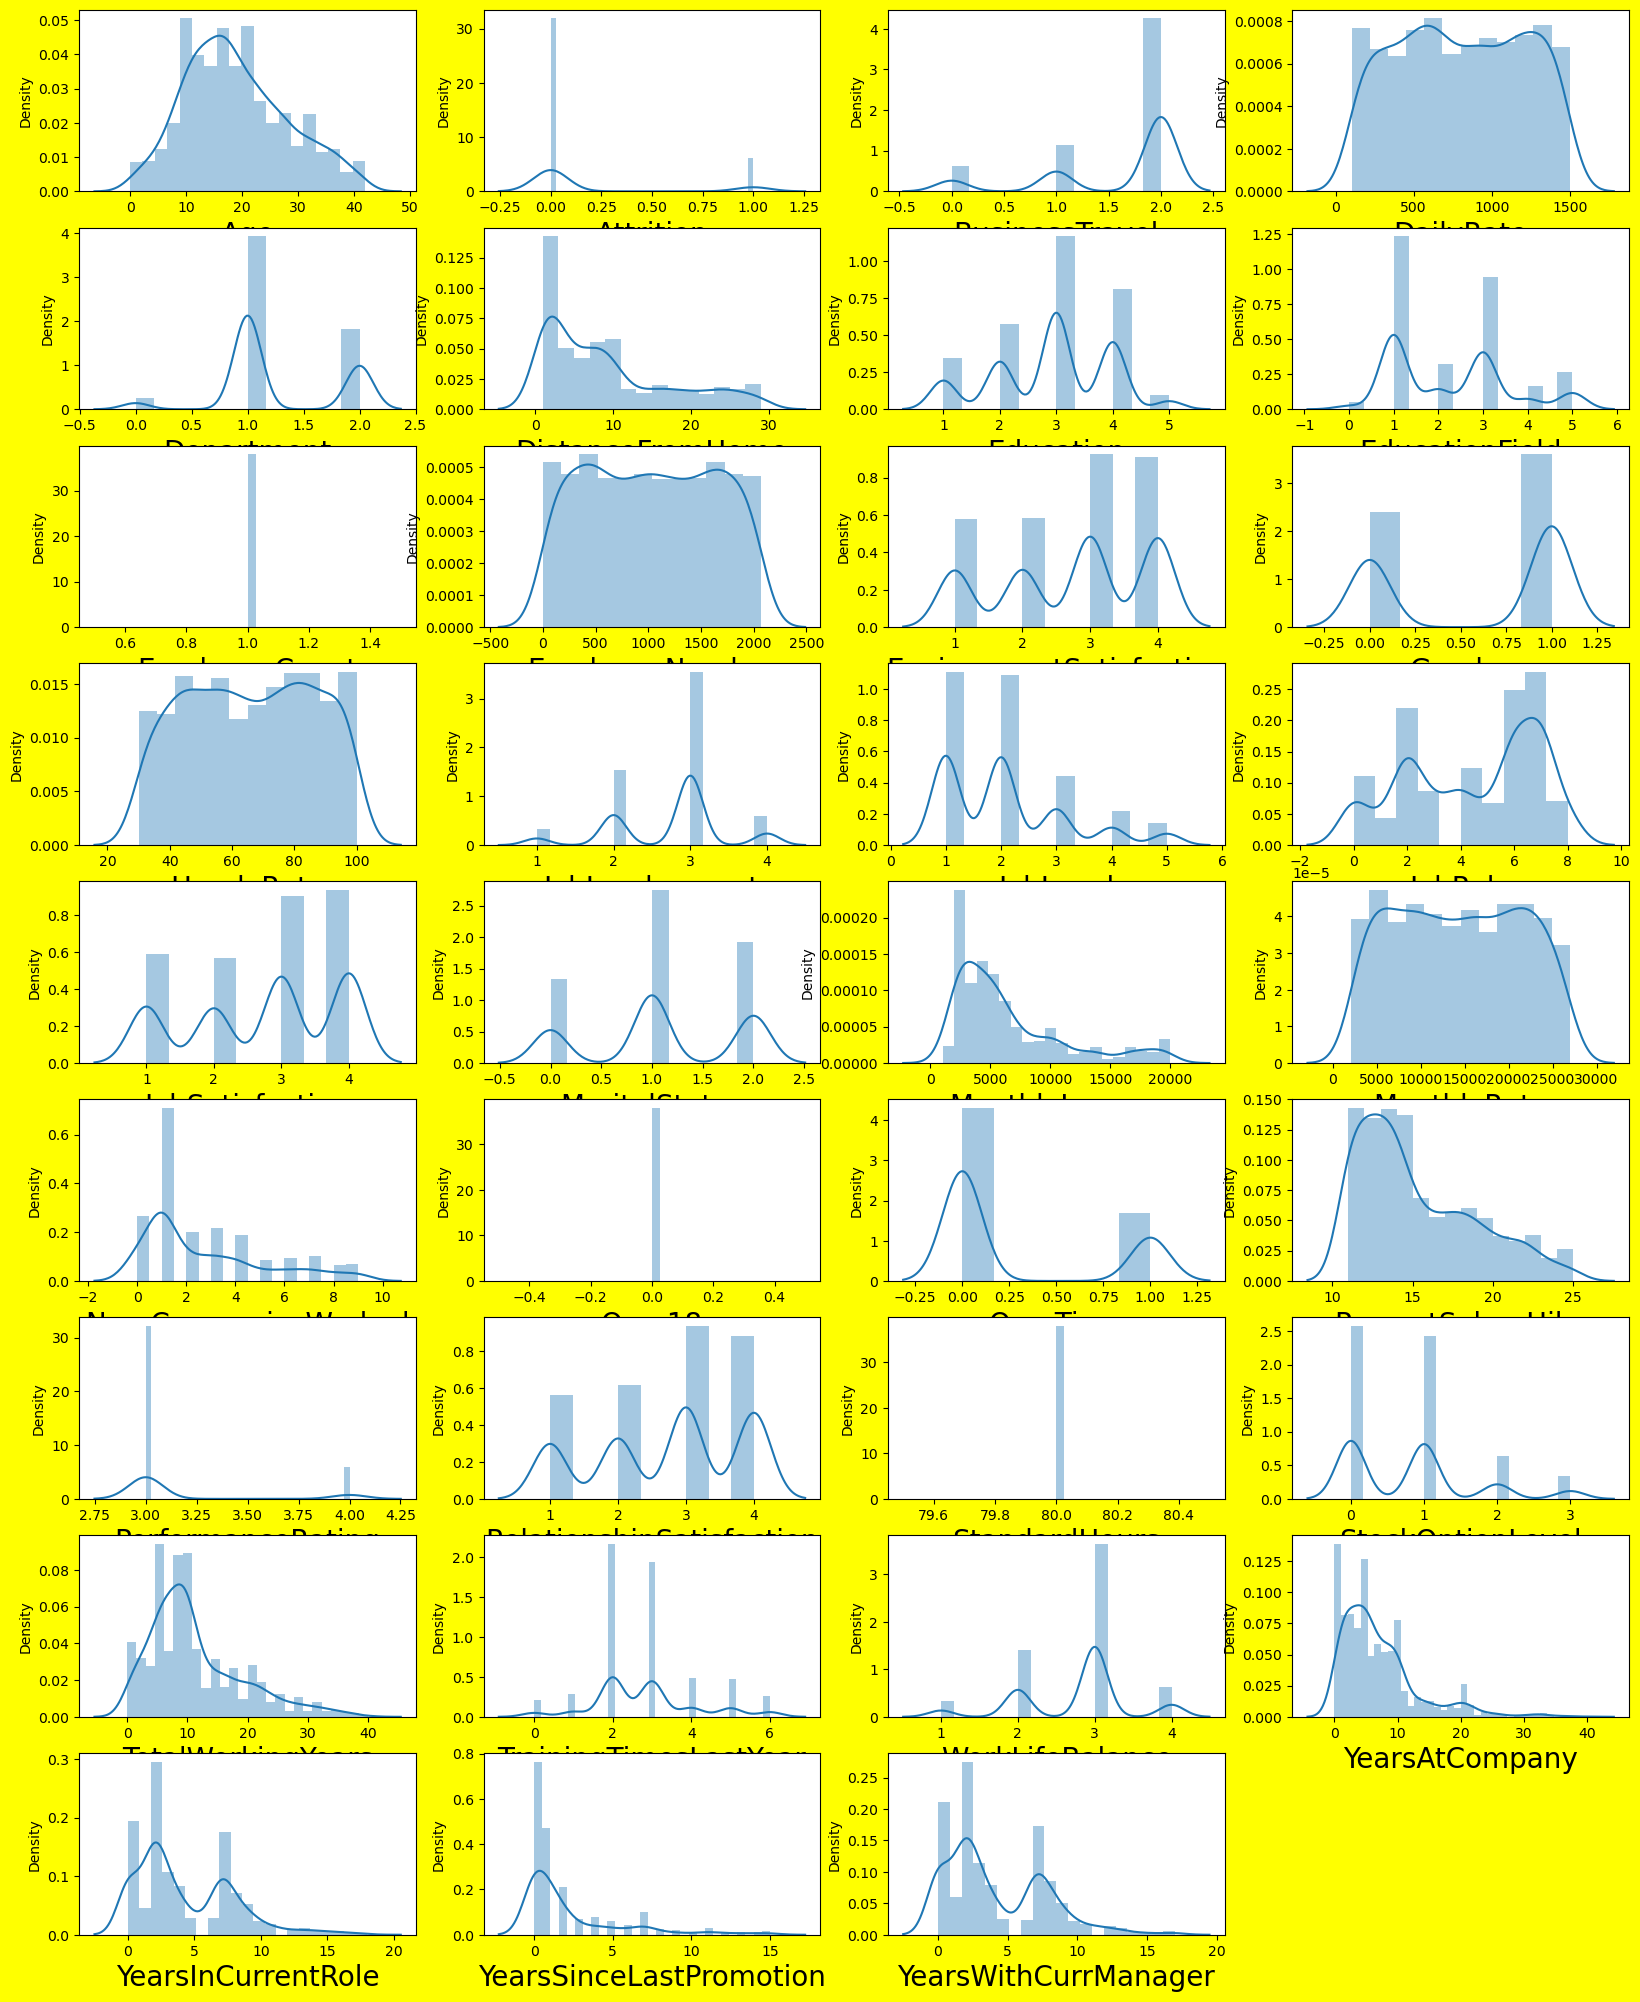

In [20]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber <=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [21]:
df_corr=data.corr().abs()

plt.figure(figsize=(100,100))
sns.heatmap(df_corr,annot=True,annot_kws={'size':40})
plt.show()

Seems there is a correlation between job level and monthly salary 

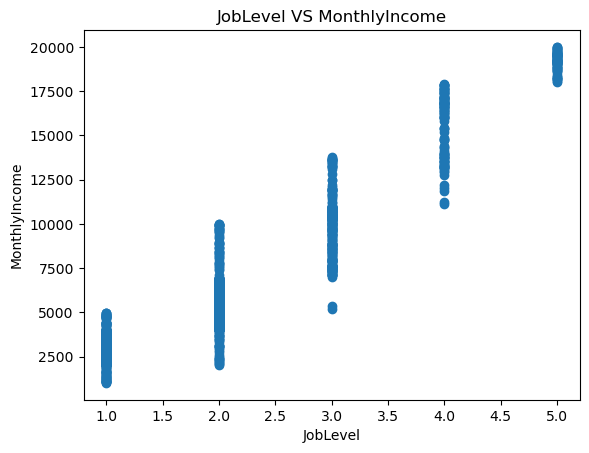

In [24]:
plt.scatter(data.JobLevel,data.MonthlyIncome)
plt.xlabel('JobLevel')
plt.ylabel('MonthlyIncome')
plt.title('JobLevel VS MonthlyIncome')
plt.show()

Reconfirmed that therte is corre;ation between joblevel and monthly income

so we are removing the job level column

In [25]:
x=data.drop(columns=['Attrition','JobLevel'])
y=data['Attrition']

Seperated the features and columns

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

Splitted the train and test data

In [27]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n==========================Train Result=====================')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('\n==========================Test Result=====================')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        
        print('\n\n Test classifiaction report\n',classification_report(y_test,pred,digits=2))

In [28]:
HR=DecisionTreeClassifier()
HR.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
metric_score(HR,x_train,x_test,y_train,y_test,train=True)
metric_score(HR,x_train,x_test,y_train,y_test,train=False)


==========================Train Result=====================
Accuracy score:100.00%

==========================Test Result=====================
Accuracy score:81.79%


 Test classifiaction report
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       318
           1       0.36      0.42      0.39        50

    accuracy                           0.82       368
   macro avg       0.63      0.65      0.64       368
weighted avg       0.83      0.82      0.82       368



The accuracy level for this model is nearly 82. Its good 
